   year  month  day weekday  ws_1  prcp_1  snwd_1  temp_2  temp_1  average  \
0  2019      1    1     Sat  4.92    0.00       0      36      37     45.6   
1  2019      1    2     Sun  5.37    0.00       0      37      40     45.7   
2  2019      1    3     Mon  6.26    0.00       0      40      39     45.8   
3  2019      1    4    Tues  5.59    0.00       0      39      42     45.9   
4  2019      1    5     Wed  3.80    0.03       0      42      38     46.0   

   actual  other  
0      40     40  
1      39     50  
2      42     42  
3      38     59  
4      45     39  
数据维度： (2191, 12)
              year        month          day         ws_1       prcp_1  \
count  2191.000000  2191.000000  2191.000000  2191.000000  2191.000000   
mean   2021.501597     6.523505    15.713829     7.371734     0.116276   
std       1.709461     3.449872     8.801867     3.154971     0.251575   
min    2019.000000     1.000000     1.000000     0.890000     0.000000   
25%    2020.000000     4.00000

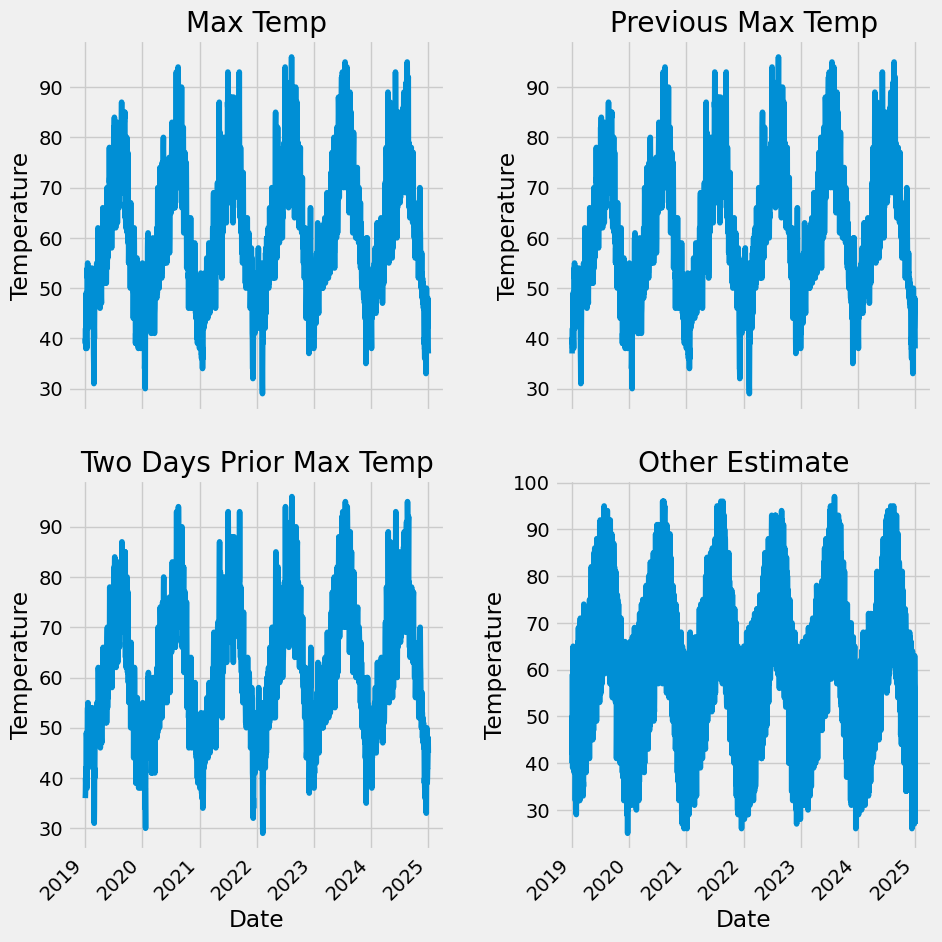

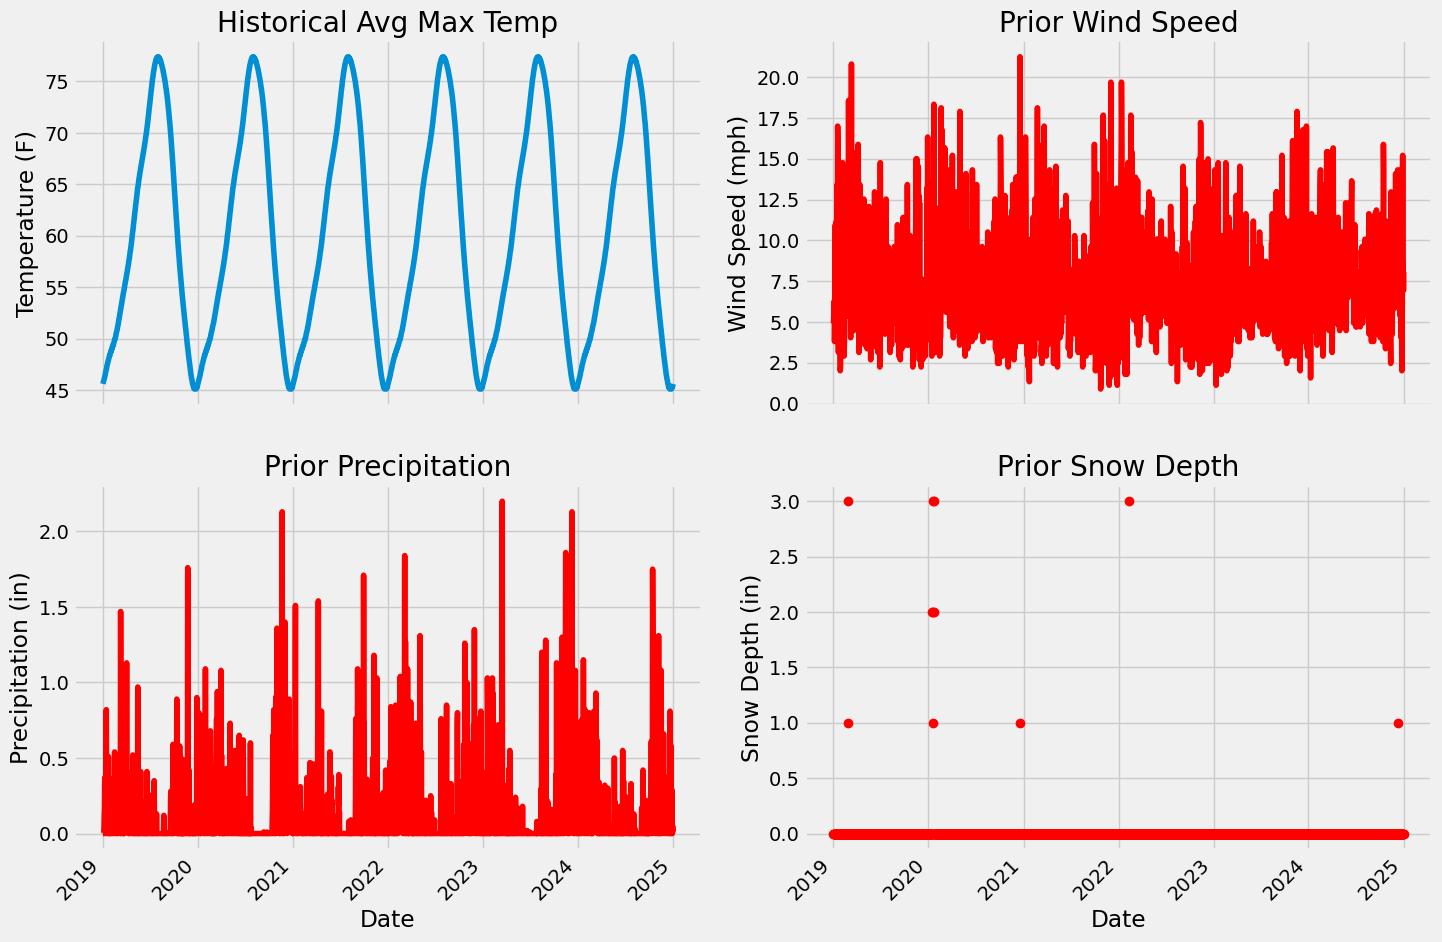

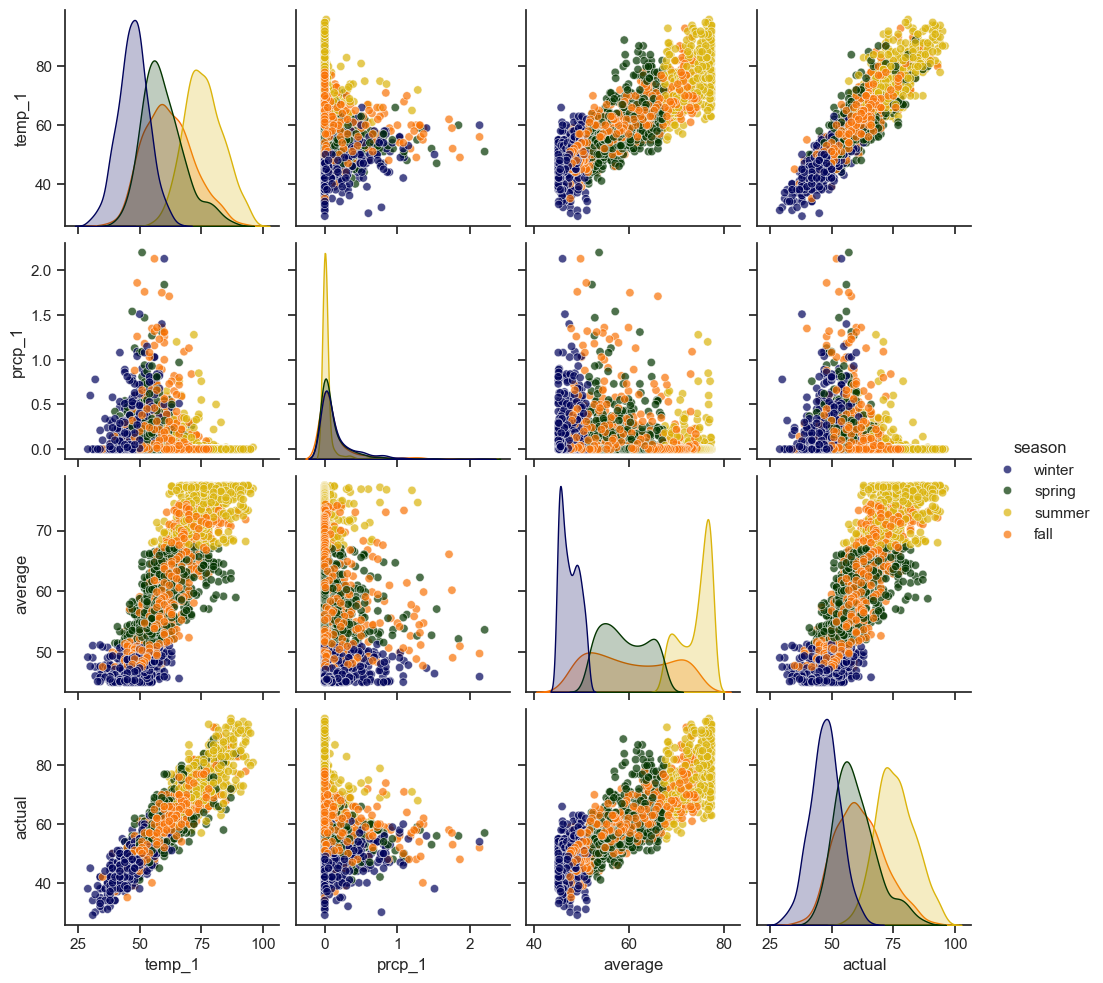

In [1]:
#数据读取
import pandas as pd

features = pd.read_csv('data/temps_extended.csv')
print(features.head(5))

print('数据维度：', features.shape)

#统计指标
print(features.describe())

#处理时间数据
import datetime

#分别表示年，月，日
years = features['year']
months = features['month']
days = features['day']

#datetime格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year,month,day in zip(years,months,days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
print(dates[:5])

#准备画图
import matplotlib.pyplot as plt

#%matplotlib inline

#指定默认风格
plt.style.use('fivethirtyeight')

# 设置布局
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

# 标签值
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# 昨天
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# 前天
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# 其他因素
ax4.plot(dates, features['other'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Other Estimate')

plt.tight_layout(pad=2)
plt.show()

# 设置整体布局
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
fig.autofmt_xdate(rotation=45)

# 平均最高气温
ax1.plot(dates, features['average'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Historical Avg Max Temp')

# 风速
ax2.plot(dates, features['ws_1'], 'r-')
ax2.set_xlabel(''); ax2.set_ylabel('Wind Speed (mph)'); ax2.set_title('Prior Wind Speed')

# 降水
ax3.plot(dates, features['prcp_1'], 'r-')
ax3.set_xlabel('Date'); ax3.set_ylabel('Precipitation (in)'); ax3.set_title('Prior Precipitation')

# 积雪
ax4.plot(dates, features['snwd_1'], 'ro')
ax4.set_xlabel('Date'); ax4.set_ylabel('Snow Depth (in)'); ax4.set_title('Prior Snow Depth')

plt.tight_layout(pad=2)
plt.show()

# 创建一个季节变量
seasons = []

for month in features['month']:
    if month in [1, 2, 12]:
        seasons.append('winter')
    elif month in [3, 4, 5]:
        seasons.append('spring')
    elif month in [6, 7, 8]:
        seasons.append('summer')
    elif month in [9, 10, 11]:
        seasons.append('fall')

# 有了季节我们就可以分析更多东西了
# 复制数据并创建季节列，避免 SettingWithCopyWarning
reduced_features = features[['temp_1', 'prcp_1', 'average', 'actual']].copy()
reduced_features.insert(loc=len(reduced_features.columns), column='season', value=seasons)


# 导入seaborn工具包
import seaborn as sns
sns.set(style="ticks", color_codes=True);

# 选择你喜欢的颜色模板
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])

# 绘制 pairplot，修改 shade=True 为 fill=True，避免 FutureWarning
sns.pairplot(reduced_features, hue='season', diag_kind='kde', palette=palette, plot_kws=dict(alpha=0.7), diag_kws=dict(fill=True))